# 3. Fine-tuning your model

Setelah melatih model Anda, tugas Anda berikutnya adalah mengevaluasi kinerjanya. Dalam bab ini, Anda akan belajar tentang beberapa metrik lain yang tersedia di scikit-learn yang akan memungkinkan Anda menilai kinerja model Anda dengan cara yang lebih bernuansa. Selanjutnya, pelajari cara mengoptimalkan model klasifikasi dan regresi Anda menggunakan **hyperparameter tunning**.

Referensi yang membantu:

* https://medium.com/@rey1024/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8
* https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=id

## How good is your model?

### Classication metrics

* Mengukur kinerja model dengan akurasi:
    * Pecahan/Fraction dari sampel yang diklasifikasikan dengan benar
    * Tidak selalu metrik yang bermanfaat

### Class imbalance example: Emails

* Klasifikasi spam
  * 99% dari email adalah real; 1% dari email adalah spam
* Bisa membuat pengelompokan yang memprediksi SEMUA email adalah real
  * 99% akurat!
  * Tapi mengerikan sebenarnya mengklasifikasikan spam
  * Gagal pada tujuan aslinya
* Perlu metrik yang lebih bernuansa

### Diagnosing classication predictions

<img src="datasets/diagnosing-classification.png" width=400px height=400px align=left />

### Metrics from the confusion matrix

* High precision: Tidak banyak email asli yang diprediksi sebagai spam
* High recall: Diprediksi sebagian besar email spam dengan benar

<img src="datasets/metrics-from-confusion-matrix.png" width=200px height=200px align=left />

### Confusion matrix in scikit-learn

```python
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

### Metrics for classification

Pada Bab 1, Anda mengevaluasi kinerja classifier k-NN Anda berdasarkan akurasinya. Namun, seperti yang didiskusikan Andy, akurasi tidak selalu merupakan metrik informatif. Dalam latihan ini, Anda akan terjun lebih dalam untuk mengevaluasi kinerja pengklasifikasi biner dengan menghitung *confusion matrix* dan menghasilkan laporan klasifikasi.

Anda mungkin telah memperhatikan dalam video bahwa laporan klasifikasi terdiri dari tiga baris, dan kolom `support` tambahan. `support` memberikan jumlah sampel dari respon sebenarnya yang terletak di kelas itu - jadi dalam contoh video, `support` adalah jumlah Partai Republik atau Demokrat dalam set `test` di mana laporan klasifikasi dihitung. Kolom `precision`, `recall`, dan `f1-score`, kemudian, memberikan metrik masing-masing untuk kelas tersebut.

Di sini, Anda akan bekerja dengan dataset [PIMA Indian](https://www.kaggle.com/uciml/pima-indians-diabetes-database) yang diperoleh dari *UCI Machine Learning Repository*. Tujuannya adalah untuk memprediksi apakah pasien wanita tertentu akan terkena diabetes berdasarkan fitur seperti BMI, usia, dan jumlah kehamilan. Oleh karena itu, ini adalah masalah klasifikasi biner. Nilai target `0` menunjukkan bahwa pasien tidak menderita diabetes, sedangkan nilai `1` menunjukkan bahwa pasien tersebut memiliki diabetes. *Seperti dalam Bab 1 dan 2, dataset telah diproses sebelumnya untuk menangani nilai yang hilang.*

Tugas Anda adalah melatih pengklasifikasi k-NN ke data dan mengevaluasi kinerjanya dengan membuat **confusion matrix dan classification report**.

In [2]:
import pandas as pd

df = pd.read_csv("datasets/diabetes.csv")
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [6]:
X = df[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']]
y = df['diabetes']

In [7]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



**Catatan** : Dengan menganalisis confusion matrix dan classification report, Anda bisa mendapatkan pemahaman yang jauh lebih baik tentang kinerja pengklasifikasi Anda.

## Logistic regression and the ROC curve

### Logistic regression for binary classication

* Logistic regression menghasilkan probabilities
* ika probabilitas 'p' lebih besar dari 0,5:
  * Data diberi label '1'
* Jika probabilitas 'p' kurang dari 0,5:
  * Data diberi label '0'

### Linear decision boundary

<img src="datasets/linear-decision.png" width=400px height=400px align=left />

### Logistic regression in scikit-learn

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
```

### Probability thresholds

* Secara default, thresholds/ambang logistic regression = 0,5
* Tidak spesifik untuk logistic regression
* k-NN classiers juga memiliki thresholds
* Apa yang terjadi jika kita memvariasikan threshold?

### The ROC curve

<img src="datasets/roc-curve.png" width=400px height=400px align=left />

### Plotting the ROC curve

```python
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
```

```python
logreg.predict_proba(X_test)[:,1]
```

### Building a logistic regression model

Saatnya membangun model logistic regression pertama Anda! Seperti yang ditunjukkan Hugo dalam video, scikit-learn membuatnya sangat mudah untuk mencoba model yang berbeda, karena paradigma **Train-Test-Split/Instantiate/Fit/Predict** berlaku untuk semua pengklasifikasi dan regressor - yang dikenal dalam scikit-learn sebagai `'estimator'` Anda akan melihatnya sendiri saat melatih model logistic regression pada data yang persis sama seperti pada latihan sebelumnya. Apakah akan mengungguli k-NN? Hanya ada satu cara untuk mengetahuinya!

In [14]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



**Catatan** : Anda sekarang tahu cara menggunakan logistic regression untuk klasifikasi biner - kerja bagus! Logistic regression digunakan dalam berbagai aplikasi pembelajaran mesin dan akan menjadi bagian penting dari data science toolbox Anda.

### Plotting an ROC curve

Pekerjaan luar biasa dalam latihan sebelumnya - Anda sekarang memiliki tambahan baru pada kotak alat klasifikasi Anda!

Classification reports dan confusion matrix adalah metode yang bagus untuk mengevaluasi kinerja model secara kuantitatif, sementara ROC Curve menyediakan cara untuk mengevaluasi model secara visual. Kebanyakan classifiers di scikit-learn memiliki metode `.predict_proba()` yang mengembalikan probabilitas sampel yang diberikan berada di kelas tertentu. Setelah membangun model logistic regression, sekarang Anda akan mengevaluasi kinerjanya dengan memplot ROC Curve. Dengan melakukannya, Anda akan menggunakan metode `.predict_proba()` dan menjadi terbiasa dengan fungsinya.

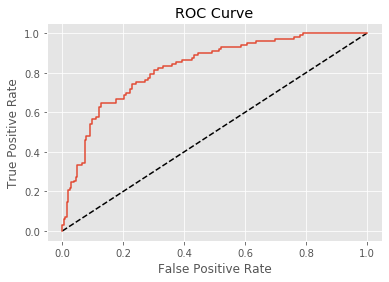

In [17]:
# Import necessary modules
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Catatan** : ROC Curve ini menyediakan cara visual yang bagus untuk menilai kinerja classifier Anda.